# Machine Learning Text Mining Project - Courses Recomendation, DRAGON-FLY

### Table of Content
<hr>

- [Imports](#1)
- [Loading Data](#2)
- [Data Cleaning](#3)
- [EDA](#4)
- [Data Preprocessing](#5)
- [Model Buiding](#6)
- [Model](#7)

### Introduction To Dataset 
<hr>

**Context**

The set of responses tagged messages that have been collected for research. It contains a set of responses from recruiters as well as students regarding their co-op program in English; 668 messages, tagged acording for personal improvement.


**Content**

The files contain one message per line. Each line is composed by Nine columns:
- (A) Responder
- (B) Terms
- (C) College
- (D) Major
- (E) Course Of Duration
- (F) Class
- (G) Citizenship
- (H) No. Of Co-op
- (I) Responsis

The Excel files contain data of the year 2021, each file has 4 slides:
- (1) Strength 
- (2) Weakness
- (3) Academic Preprations
- (4) College specific Questions


### Imports <a name = "1"></a>
<hr>

In [52]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import seaborn as sns
from string import punctuation
from wordcloud import WordCloud
from collections import Counter
import pickle

### Loading Data <a name="2"></a>
<hr>

I am using a dataset, downloaded from Drexel Learn provided by Dr. Murugan Anandarajan

In [53]:
data_df = pd.read_excel("AY 2021 BBE EFR Free Response.xlsx", header=1)
data_df_2 = pd.read_excel("AY 2021 BBE EFR Free Response.xlsx", header=1, sheet_name="Weaknesses")

# As we can see the data information with not null counts. Hence, most of the data are in Respond Id to response columns; total 9 columns.
# However, first row have unnamed indexing, such as Unnamed: 2, Unnamed: 3 and Unnamed: 4 .... up till Unnamed: 8.
# So, lets drop this unwanted row.

data_strength = data_df
data_weakness = data_df_2

data_strength.head(5)

,Responder ID,Terms,Coll,Major,Conc 1,Class BOT,Citizenship,Coop #,What are the student's strengths?
0,3581,Fall/Winter,B,ACCT,5COP,SR,Domestic,Second,Ability to get along with and work well with o...
1,3584,Fall/Winter,B,INT2,5COP,SR,Domestic,First,Will is very good at tackling problems head on...
2,3588,Fall/Winter,B,FIN,5COP,SR,Domestic,Third/Final,"Proactive, focused, detail-oriented, efficient"
3,42,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,She is a very fast learner and is always looki...
4,3600,Fall/Winter,B,MKTG,5COP,SR,Domestic,Third/Final,John wants to learn and improve. I was impress...


In [54]:
data_weakness.head(5)

,Responder ID,Terms,Coll,Major,Conc 1,Class BOT,Citizenship,Coop #,What are the student's weaknesses/areas for improvement?
0,3581,Fall/Winter,B,ACCT,5COP,SR,Domestic,Second,Kali could be a little more outspoken and dema...
1,3584,Fall/Winter,B,INT2,5COP,SR,Domestic,First,Will should continue to work on his data analy...
2,3588,Fall/Winter,B,FIN,5COP,SR,Domestic,Third/Final,NaN
3,42,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,She doesn't communicate through email very wel...
4,3600,Fall/Winter,B,MKTG,5COP,SR,Domestic,Third/Final,John has not yet found his voice. He offers op...


In [55]:
data_weakness.shape

(667, 9)

In [56]:
data_strength.shape

(671, 9)

In [57]:
data_strength.sample(20)

,Responder ID,Terms,Coll,Major,Conc 1,Class BOT,Citizenship,Coop #,What are the student's strengths?
234,4459,Fall/Winter,B,MKTG,5COP,PJ,Domestic,First/Only,Simon has great enthusiasm and always presents...
650,5741,Fall/Winter,B,BSAN,4COP,SR,Domestic,First/Only,"Some of her strengths are flexibility, honesty..."
18,3671,Fall/Winter,BE,ECON,5COP,SR,Domestic,Second,Anoushka is very committed individual with a s...
397,2204,Spring/Summer,B,FIN,5COP,JR,International,Second,Rediet's strengths include her curiosity and h...
21,128,Spring/Summer,B,MKTG,5COP,SR,Domestic,Third/Final,Sydney is adaptable - willing to work on a var...
122,3988,Fall/Winter,B,LGST,5COP,SR,Domestic,Second,Rowan has incredible work ethic and dedication...
549,5480,Fall/Winter,B,B000,5COP,SO,Domestic,First,Justin is very punctual and very professional.
322,4868,Fall/Winter,B,FIN,5COP,JR,Domestic,First,"-team player, always willing to help team memb..."
373,2014,Spring/Summer,B,FIN,5COP,SR,Domestic,Second,Kaitlyn has outstanding communication skills. ...
628,3332,Spring/Summer,B,MKTG,5COP,SR,Domestic,First,Julia is a joy to work with. She can take on a...


In [58]:
data_weakness.sample(20)

,Responder ID,Terms,Coll,Major,Conc 1,Class BOT,Citizenship,Coop #,What are the student's weaknesses/areas for improvement?
486,2706,Spring/Summer,B,SPBS,5COP,PJ,Domestic,First,"His work is great, he just need to slow down a..."
629,3377,Spring/Summer,B,MKTG,5COP,PJ,Domestic,First,Xavier needs to slow down a bit and focus on h...
429,2448,Spring/Summer,B,ACCT,5COP,JR,Domestic,Second,"John has a tendency to use ""slang"" language. ..."
88,527,Spring/Summer,B,BAE,5COP,SR,Domestic,Third/Final,"If unclear, Ryan should strive to understand m..."
351,1851,Spring/Summer,BE,ECON,4COP,SR,Domestic,First/Only,- Difficulty identifying issues due to lack of...
186,4228,Fall/Winter,B,ACCT,5COP,JR,International,Third/Final,Shumit needs to improve his professionalism. ...
327,4893,Fall/Winter,B,FIN,4COP,SR,Domestic,First/Only,An area for Janelle to improve upon is her abi...
130,809,Spring/Summer,B,OSCM,4COP,SR,International,First/Only,Needs to be more confident. He has great ideas...
584,1261,Spring/Summer,B,MKTG,5COP,PJ,International,First,Needs to improve proactiveness and taking init...
235,4467,Fall/Winter,B,SPBS,5COP,PJ,Domestic,Second,"When verbally communicating changes to Aaron, ..."


### Data Cleaning <a name="3"></a>
<hr>

In [59]:
data_strength.info

<bound method DataFrame.info of      Responder ID          Terms Coll Major Conc 1 Class BOT    Citizenship  \
0            3581    Fall/Winter    B  ACCT   5COP        SR       Domestic   
1            3584    Fall/Winter    B  INT2   5COP        SR       Domestic   
2            3588    Fall/Winter    B   FIN   5COP        SR       Domestic   
3              42  Spring/Summer    B   FIN   5COP        PJ       Domestic   
4            3600    Fall/Winter    B  MKTG   5COP        SR       Domestic   
..            ...            ...  ...   ...    ...       ...            ...   
666          5773    Fall/Winter    B   FIN   4COP        SR       Domestic   
667          3541  Spring/Summer   BE  ECON   5COP        JR  International   
668          3548  Spring/Summer    B   FIN   5COP        SO       Domestic   
669          3550  Spring/Summer    B  LGST   5COP        JR       Domestic   
670          3563  Spring/Summer   BE  ECON   5COP        JR       Domestic   

          Coop #   

In [60]:
data_strength.sample(14)

,Responder ID,Terms,Coll,Major,Conc 1,Class BOT,Citizenship,Coop #,What are the student's strengths?
70,442,Spring/Summer,B,MKTG,5COP,SR,Domestic,Third/Final,Detail Oriented- Briana is very meticulous and...
474,5231,Fall/Winter,B,BSAN,5COP,PJ,Domestic,First,Tyler conducts himself in a professional and c...
447,2565,Spring/Summer,B,FIN,5COP,SR,Domestic,Second,Simon has a wide range of strengths but I woul...
282,4697,Fall/Winter,B,FIN,5COP,JR,Domestic,First/Only,"Kyle was very punctual, accessible and on poin..."
208,4324,Fall/Winter,B,FIN,5COP,PJ,Domestic,Second,Kyle absorbs information at an incredible rate...
532,5422,Fall/Winter,B,FIN,5COP,SO,Domestic,First,"Saifullah always has a positive attitude, comm..."
80,3845,Fall/Winter,B,FIN,5COP,JR,Domestic,Third/Final,Very punctual and motivated to learn and grow....
10,67,Spring/Summer,B,MKTG,5COP,SR,Domestic,Third/Final,Skyler consistently demonstrated the following...
496,5307,Fall/Winter,B,FIN,5COP,SO,Domestic,First,Rohan is friendly and gets along great with hi...
488,5268,Fall/Winter,B,BSAN,5COP,SO,Domestic,First,• Quick Learner_x000D_\n• Ability to work at a...


In [61]:
# We have a unwanted column ["coll"] because it give the info regarding the college, and the whole column interprets the data from the same college.
# lets check the data and match it with the the total number of rows
duplicate_values = data_strength["Coll"].duplicated().sum()
print("""Duplicate Values in our dataframe["Coll"]: {}""".format(duplicate_values))

Duplicate Values in our dataframe["Coll"]: 669


In [62]:
# So the total number of duplicates we have in the ["coll"] = to the Index[-1]
# Its better to drop that column
data_strength.drop('Coll', axis=1, inplace=True)
data_strength

,Responder ID,Terms,Major,Conc 1,Class BOT,Citizenship,Coop #,What are the student's strengths?
0,3581,Fall/Winter,ACCT,5COP,SR,Domestic,Second,Ability to get along with and work well with o...
1,3584,Fall/Winter,INT2,5COP,SR,Domestic,First,Will is very good at tackling problems head on...
2,3588,Fall/Winter,FIN,5COP,SR,Domestic,Third/Final,"Proactive, focused, detail-oriented, efficient"
3,42,Spring/Summer,FIN,5COP,PJ,Domestic,First,She is a very fast learner and is always looki...
4,3600,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,John wants to learn and improve. I was impress...
...,...,...,...,...,...,...,...,...
666,5773,Fall/Winter,FIN,4COP,SR,Domestic,First,Very hardworking and always ready to learn more.
667,3541,Spring/Summer,ECON,5COP,JR,International,First,Damaris was strong and consistent throughout h...
668,3548,Spring/Summer,FIN,5COP,SO,Domestic,First,Drue is very personable and professional and d...
669,3550,Spring/Summer,LGST,5COP,JR,Domestic,First,Her abilities to analyze and interpret data ar...


In [63]:
data_weakness.shape

(667, 9)

In [64]:
# Lets do the same process for the "Weekness" sheet
duplicate_values_weakness = data_weakness["Coll"].duplicated().sum()
print("""Duplicate Values in our dataframe["Coll"]: {}""".format(duplicate_values_weakness))

Duplicate Values in our dataframe["Coll"]: 665


In [65]:
# let's drop the unwanted column
data_weakness.drop('Coll', axis=1, inplace=True)
data_weakness

,Responder ID,Terms,Major,Conc 1,Class BOT,Citizenship,Coop #,What are the student's weaknesses/areas for improvement?
0,3581,Fall/Winter,ACCT,5COP,SR,Domestic,Second,Kali could be a little more outspoken and dema...
1,3584,Fall/Winter,INT2,5COP,SR,Domestic,First,Will should continue to work on his data analy...
2,3588,Fall/Winter,FIN,5COP,SR,Domestic,Third/Final,NaN
3,42,Spring/Summer,FIN,5COP,PJ,Domestic,First,She doesn't communicate through email very wel...
4,3600,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,John has not yet found his voice. He offers op...
...,...,...,...,...,...,...,...,...
662,5773,Fall/Winter,FIN,4COP,SR,Domestic,First,Xiaoqian has scope to improve her verbal commu...
663,3541,Spring/Summer,ECON,5COP,JR,International,First,I haven’t noticed any deficiencies; I think sh...
664,3548,Spring/Summer,FIN,5COP,SO,Domestic,First,Drue wants to work for a hedge fund. He would ...
665,3550,Spring/Summer,LGST,5COP,JR,Domestic,First,It's crucial to establish an online communicat...


In [66]:
#checking null values in the dataframne

data_strength.isnull().sum()

# we do have some null values in the last column, let's drop the row with the nan values
data_strength.dropna(inplace=True)
print(data_strength)

     Responder ID          Terms Major Conc 1 Class BOT    Citizenship  \
0            3581    Fall/Winter  ACCT   5COP        SR       Domestic   
1            3584    Fall/Winter  INT2   5COP        SR       Domestic   
2            3588    Fall/Winter   FIN   5COP        SR       Domestic   
3              42  Spring/Summer   FIN   5COP        PJ       Domestic   
4            3600    Fall/Winter  MKTG   5COP        SR       Domestic   
..            ...            ...   ...    ...       ...            ...   
666          5773    Fall/Winter   FIN   4COP        SR       Domestic   
667          3541  Spring/Summer  ECON   5COP        JR  International   
668          3548  Spring/Summer   FIN   5COP        SO       Domestic   
669          3550  Spring/Summer  LGST   5COP        JR       Domestic   
670          3563  Spring/Summer  ECON   5COP        JR       Domestic   

          Coop #                  What are the student's strengths?  
0         Second  Ability to get along wi

In [67]:
data_weakness.isnull().sum()

Responder ID                                                 0
Terms                                                        0
Major                                                        0
Conc 1                                                       0
Class BOT                                                    0
Citizenship                                                  0
Coop #                                                       0
What are the student's weaknesses/areas for improvement?    30
dtype: int64

In [68]:
#checking null values in the dataframne

data_weakness.isnull().sum()

# we do have some null values in the last column, let's drop the row with the nan values
data_weakness.dropna(inplace=True)
print(data_weakness)

     Responder ID          Terms Major Conc 1 Class BOT    Citizenship  \
0            3581    Fall/Winter  ACCT   5COP        SR       Domestic   
1            3584    Fall/Winter  INT2   5COP        SR       Domestic   
3              42  Spring/Summer   FIN   5COP        PJ       Domestic   
4            3600    Fall/Winter  MKTG   5COP        SR       Domestic   
5            3608    Fall/Winter  MKTG   5COP        SR       Domestic   
..            ...            ...   ...    ...       ...            ...   
662          5773    Fall/Winter   FIN   4COP        SR       Domestic   
663          3541  Spring/Summer  ECON   5COP        JR  International   
664          3548  Spring/Summer   FIN   5COP        SO       Domestic   
665          3550  Spring/Summer  LGST   5COP        JR       Domestic   
666          3563  Spring/Summer  ECON   5COP        JR       Domestic   

          Coop # What are the student's weaknesses/areas for improvement?  
0         Second  Kali could be a l

In [69]:
# Checking if the data has bullet points in it 
bullet_pattern = r'^[•*\-]\s*'

bullets = data_strength.apply(lambda row: row.astype(str).str.contains(bullet_pattern)).any().any()

if bullets:
    print("The DataFrame contains bullet points.")
else:
    print("No bullet points found in the DataFrame.")

The DataFrame contains bullet points.


In [70]:
# we do have bullet points, let's remove it 

data_strength = data_strength.replace(bullet_pattern, '', regex=True)
print(data_strength)

     Responder ID          Terms Major Conc 1 Class BOT    Citizenship  \
0            3581    Fall/Winter  ACCT   5COP        SR       Domestic   
1            3584    Fall/Winter  INT2   5COP        SR       Domestic   
2            3588    Fall/Winter   FIN   5COP        SR       Domestic   
3              42  Spring/Summer   FIN   5COP        PJ       Domestic   
4            3600    Fall/Winter  MKTG   5COP        SR       Domestic   
..            ...            ...   ...    ...       ...            ...   
666          5773    Fall/Winter   FIN   4COP        SR       Domestic   
667          3541  Spring/Summer  ECON   5COP        JR  International   
668          3548  Spring/Summer   FIN   5COP        SO       Domestic   
669          3550  Spring/Summer  LGST   5COP        JR       Domestic   
670          3563  Spring/Summer  ECON   5COP        JR       Domestic   

          Coop #                  What are the student's strengths?  
0         Second  Ability to get along wi

In [71]:
# removing bullets from sheet 2

bullets_weakness = data_weakness.apply(lambda row: row.astype(str).str.contains(bullet_pattern)).any().any()

if bullets_weakness:
    print("The DataFrame contains bullet points.")
else:
    print("No bullet points found in the DataFrame.")

The DataFrame contains bullet points.


In [72]:
data_weakness = data_weakness.replace(bullet_pattern, '', regex=True)
print(data_weakness)

     Responder ID          Terms Major Conc 1 Class BOT    Citizenship  \
0            3581    Fall/Winter  ACCT   5COP        SR       Domestic   
1            3584    Fall/Winter  INT2   5COP        SR       Domestic   
3              42  Spring/Summer   FIN   5COP        PJ       Domestic   
4            3600    Fall/Winter  MKTG   5COP        SR       Domestic   
5            3608    Fall/Winter  MKTG   5COP        SR       Domestic   
..            ...            ...   ...    ...       ...            ...   
662          5773    Fall/Winter   FIN   4COP        SR       Domestic   
663          3541  Spring/Summer  ECON   5COP        JR  International   
664          3548  Spring/Summer   FIN   5COP        SO       Domestic   
665          3550  Spring/Summer  LGST   5COP        JR       Domestic   
666          3563  Spring/Summer  ECON   5COP        JR       Domestic   

          Coop # What are the student's weaknesses/areas for improvement?  
0         Second  Kali could be a l

In [73]:
# removing link from data frame
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

no_links = data_strength[~data_strength.apply(lambda row: row.astype(str).str.contains(url_pattern)).any(axis=1)]
print(no_links)

     Responder ID          Terms Major Conc 1 Class BOT    Citizenship  \
0            3581    Fall/Winter  ACCT   5COP        SR       Domestic   
1            3584    Fall/Winter  INT2   5COP        SR       Domestic   
2            3588    Fall/Winter   FIN   5COP        SR       Domestic   
3              42  Spring/Summer   FIN   5COP        PJ       Domestic   
4            3600    Fall/Winter  MKTG   5COP        SR       Domestic   
..            ...            ...   ...    ...       ...            ...   
666          5773    Fall/Winter   FIN   4COP        SR       Domestic   
667          3541  Spring/Summer  ECON   5COP        JR  International   
668          3548  Spring/Summer   FIN   5COP        SO       Domestic   
669          3550  Spring/Summer  LGST   5COP        JR       Domestic   
670          3563  Spring/Summer  ECON   5COP        JR       Domestic   

          Coop #                  What are the student's strengths?  
0         Second  Ability to get along wi

In [74]:
# removing link from data frame; sheet2
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

no_links = data_weakness[~data_weakness.apply(lambda row: row.astype(str).str.contains(url_pattern)).any(axis=1)]
print(no_links)

     Responder ID          Terms Major Conc 1 Class BOT    Citizenship  \
0            3581    Fall/Winter  ACCT   5COP        SR       Domestic   
1            3584    Fall/Winter  INT2   5COP        SR       Domestic   
3              42  Spring/Summer   FIN   5COP        PJ       Domestic   
4            3600    Fall/Winter  MKTG   5COP        SR       Domestic   
5            3608    Fall/Winter  MKTG   5COP        SR       Domestic   
..            ...            ...   ...    ...       ...            ...   
662          5773    Fall/Winter   FIN   4COP        SR       Domestic   
663          3541  Spring/Summer  ECON   5COP        JR  International   
664          3548  Spring/Summer   FIN   5COP        SO       Domestic   
665          3550  Spring/Summer  LGST   5COP        JR       Domestic   
666          3563  Spring/Summer  ECON   5COP        JR       Domestic   

          Coop # What are the student's weaknesses/areas for improvement?  
0         Second  Kali could be a l

### EDA <a name="4"></a>
<hr>

In [39]:
data_strength["Major"].value_counts()

Major
FIN     198
MKTG    134
ACCT     45
SPBS     41
GBUS     41
MIS      40
BAE      32
ECON     24
BSAN     22
OSCM     20
LGST     18
INT1     15
REMD     10
B000     10
SMT       7
ESPB      3
INT2      2
BAEC      2
EB        2
BEBO      2
OMGT      2
TIMS      1
Name: count, dtype: int64

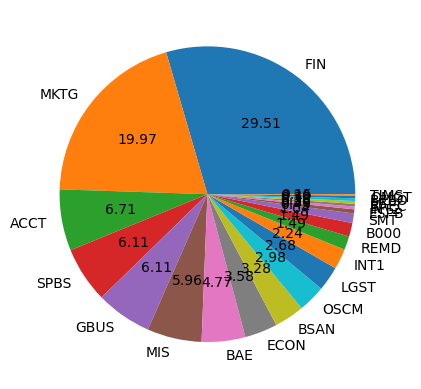

In [56]:
# Plotting the pie chat; student's major 
plt.pie(data_strength['Major'].value_counts(),
         labels=["FIN",
                 "MKTG",
                 "ACCT",
                 "SPBS",
                 "GBUS",
                 "MIS",
                 "BAE",
                 "ECON",
                 "BSAN",
                 "OSCM",
                 "LGST",
                 "INT1",
                 "REMD",
                 "B000",
                 "SMT",
                 "ESPB",
                 "INT2",
                 "BAEC",
                 "EB",
                 "BEBO",
                 "OMGT",
                 "TIMS"],
        autopct="%0.2f");

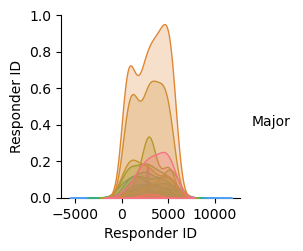

In [65]:
sns.pairplot(data_strength, hue="Major")

In [67]:
sns.heatmap(data_strength.corr())

ValueError: could not convert string to float: 'Fall/Winter'